In [2]:
#importing common functions
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy


from scipy import stats

### Problem 1.
A) First, we set up the poisson probability mass function (PMF) using stats.poisson.pmf,   
with background cosmic ray noise values (X) from 0 to 15, and a hypothetical average of **5.432**.    
Then, with each additional day, we take the previous day's PMF and the initial PMF,  
use np.convolve, to integrate result of all days. X valus are also increased accordingly.  
The results are plotted below:

In [3]:
#picking a hypothetical average cosmic-ray background:
x_background = 5.432

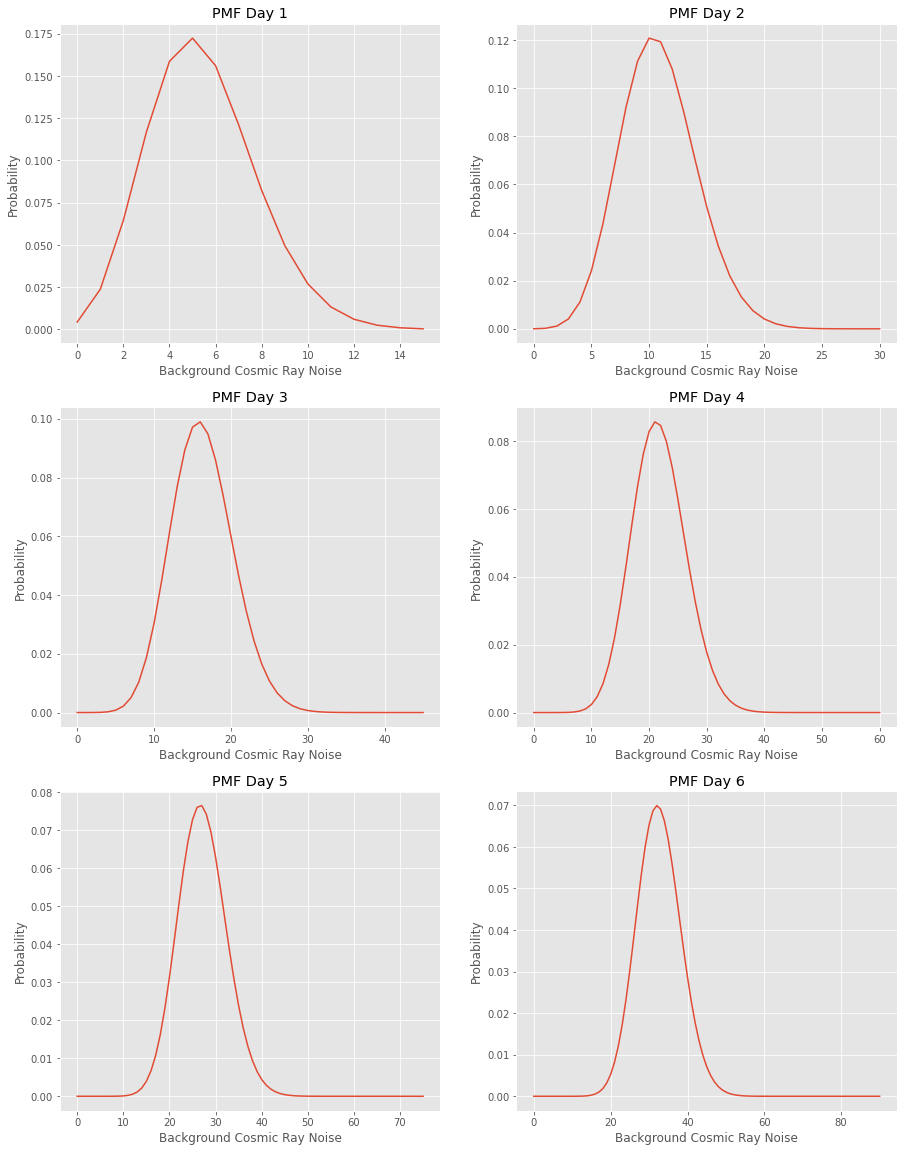

In [7]:
plt.rcParams["figure.figsize"] = (15,20)
plt.style.use('ggplot')

fig, ax = plt.subplots(3, 2)

n_terms = 15
x1 = np.arange(0,n_terms+1)

y_poi1 = stats.poisson.pmf(x1, x_background)
ax[0,0].plot(x1, y_poi1)
ax[0,0].set_title('PMF Day 1')
ax[0,0].set_xlabel("Background Cosmic Ray Noise")
ax[0,0].set_ylabel("Probability")

x2 = np.arange(0,n_terms*2+1)
y_poi2 = np.convolve(y_poi1, y_poi1)
ax[0,1].plot(x2, y_poi2)
ax[0,1].set_title('PMF Day 2')
ax[0,1].set_xlabel("Background Cosmic Ray Noise")
ax[0,1].set_ylabel("Probability")

x3 = np.arange(0,n_terms*3+1)
y_poi3 = np.convolve(y_poi2, y_poi1)
ax[1,0].plot(x3, y_poi3)
ax[1,0].set_title('PMF Day 3')
ax[1,0].set_xlabel("Background Cosmic Ray Noise")
ax[1,0].set_ylabel("Probability")

x4 = np.arange(0,n_terms*4+1)
y_poi4 = np.convolve(y_poi3, y_poi1)
ax[1,1].plot(x4, y_poi4)
ax[1,1].set_title('PMF Day 4')
ax[1,1].set_xlabel("Background Cosmic Ray Noise")
ax[1,1].set_ylabel("Probability")

x5 = np.arange(0,n_terms*5+1)
y_poi5 = np.convolve(y_poi4, y_poi1)
ax[2,0].plot(x5, y_poi5)
ax[2,0].set_title('PMF Day 5')
ax[2,0].set_xlabel("Background Cosmic Ray Noise")
ax[2,0].set_ylabel("Probability")

x6 = np.arange(0,n_terms*6+1)
y_poi6 = np.convolve(y_poi5, y_poi1)
ax[2,1].plot(x6, y_poi6)
ax[2,1].set_title('PMF Day 6');
ax[2,1].set_xlabel("Background Cosmic Ray Noise")
ax[2,1].set_ylabel("Probability");


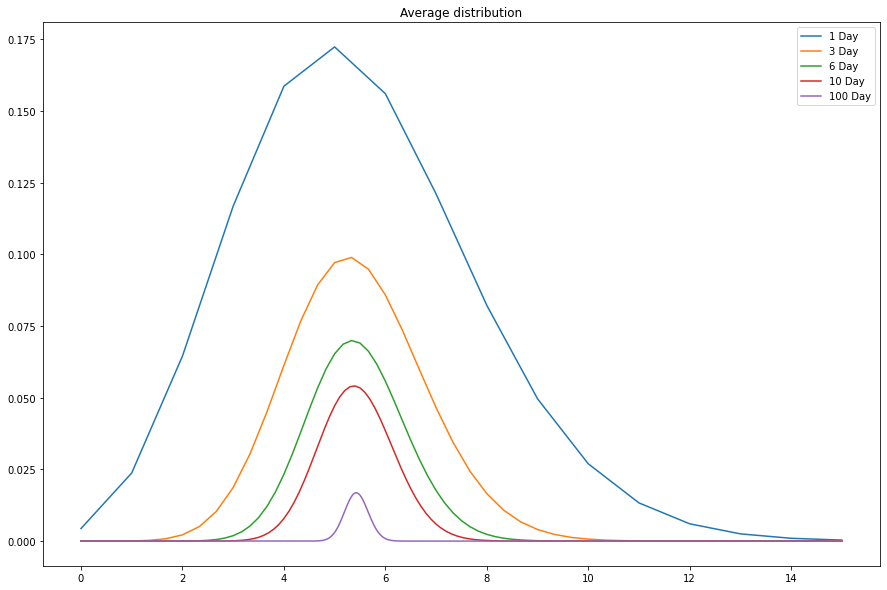

In [148]:
plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots(1,1)

ax.set_title("Average distribution")
ax.plot(x1/1, y_poi, label = "1 Day")
ax.plot(x3/3, y_poi3,label = "3 Day")
ax.plot(x6/6, y_poi6,label = "6 Day");

y_poi10 = y_poi
for i in range(10-1):
    y_poi10 = np.convolve(y_poi,y_poi10)
ax.plot(np.arange(0,n_terms*10+1)/10, y_poi10,label = "10 Day");

y_poi100 = y_poi
for i in range(100-1):
    y_poi100 = np.convolve(y_poi,y_poi100)
ax.plot(np.arange(0,n_terms*100+1)/100, y_poi100,label = "100 Day");
                       
ax.legend()

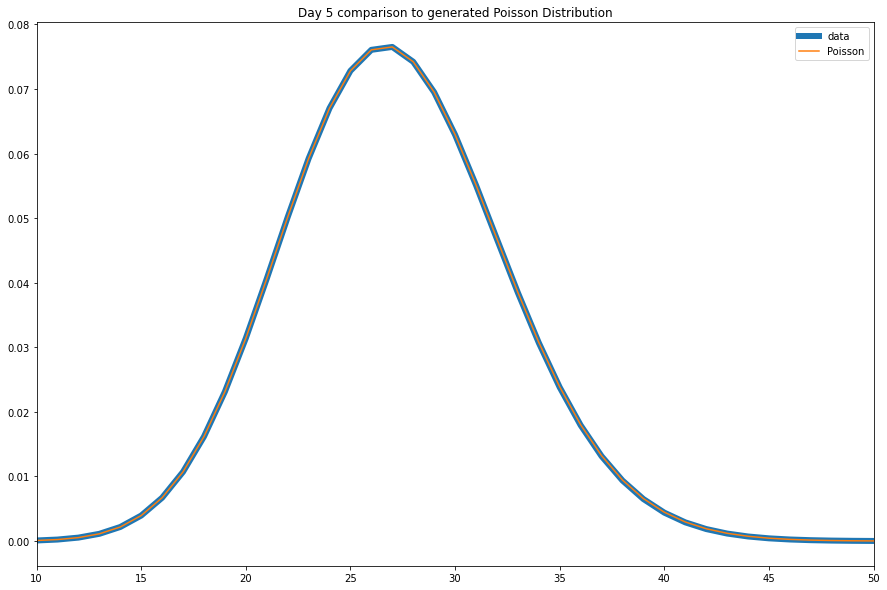

In [185]:
plt.rcParams["figure.figsize"] = (15,10)

fig, ax = plt.subplots(1,1)

ax.set_title("Day 5 comparison to generated Poisson Distribution")
ax.set_xlim(10,50)
ax.plot(x5, y_poi5, label = "data", linewidth = 6)
ax.plot(x5, stats.poisson.pmf(x5, x_background*5), label = "Poisson")
                       
ax.legend();

In [139]:
sum(y_poi100)

0.9826884120580979

mean stays the same, standard deviation reduced by $\sqrt{n}$

Y = 8, N = 6, then:

In [149]:
p_86 = 0
for i, val in enumerate(y_poi6):
    if (i > 8*6):
        p_86 += val
p_86

0.004166825807551127

In [151]:
stats.norm.ppf(1- p_86)

2.638244322687055

It would be 2.64 $\sigma$